# Week 3

### 01 Assignment

[The assignment can be found here.](https://github.com/Hartmannsolution/docker_notebooks/blob/master/notebooks/03-Exercise.ipynb)

### 02 Status

I completed all the exercises. 

### 03 Solutions
#### Exercise 1
The solution to 1 - 6 is in modules/week03_ex1.py

In [61]:
%matplotlib inline
%matplotlib notebook
import modules.week03_ex1 as ex1

In [62]:
# 7
import random 
import csv

def generate_students(n):
    """A function that can generate n number of students with random:
    name, gender, courses (from a fixed list of course names), grades, img_url

    Parameters:
    n: Number of random student wanted
    """
    students = []
    names = ['John', 'Jane', 'Jessica', 'Jack', 'Bob', 'Billy', 'Josephine', 'Anne', 'Susan', 'George', 'Rex']
    genders = ['female', 'male', 'other']
    grades = [-3, 0, 2, 4, 7, 10, 12]
    course_names = ['Math', 'English', 'History', 'PE', 'Programming', 'Security']
    classrooms = ['C-105', 'C-162', 'C-102', 'C-265']
    
    for i in range(n):
        no_courses = random.choice(range(5)) + 1
        courses = []
        for course_name in random.sample(course_names, no_courses):
            courses.append(ex1.Course(course_name, 
            random.choice(classrooms), random.choice(names), ((random.choice(range(5)) + 1) * 10), random.choice(grades)))
        image_url = 'picture' + str(i) + '.jpg'
        student = ex1.Student(random.choice(names), random.choice(genders), ex1.DataSheet(courses), image_url)  
        students.append(student)
    return students

students = generate_students(5)
print(students)

[Student('Jessica', 'male', Datasheet([Course('PE', 'C-102', 'Bob', 50, 4), Course('History', 'C-102', 'Rex', 30, 2), Course('English', 'C-265', 'Susan', 10, 2), Course('Math', 'C-265', 'Anne', 40, 4)]), 'picture0.jpg'), Student('Billy', 'female', Datasheet([Course('Security', 'C-105', 'Jane', 50, 4), Course('Programming', 'C-162', 'Billy', 40, 4), Course('History', 'C-102', 'Josephine', 20, -3)]), 'picture1.jpg'), Student('Rex', 'male', Datasheet([Course('English', 'C-162', 'Susan', 40, 4), Course('Programming', 'C-162', 'Jessica', 50, 12)]), 'picture2.jpg'), Student('Josephine', 'female', Datasheet([Course('Security', 'C-265', 'Anne', 10, 10), Course('History', 'C-162', 'Jessica', 30, 10)]), 'picture3.jpg'), Student('Susan', 'male', Datasheet([Course('English', 'C-265', 'Jessica', 50, 0), Course('Math', 'C-265', 'Anne', 10, 2), Course('History', 'C-162', 'George', 10, 7), Course('Security', 'C-105', 'Jack', 50, -3), Course('Programming', 'C-102', 'Susan', 20, 12)]), 'picture4.jpg')]


In [63]:
# 7.A
def write_students_to_csv(students, out='students.csv'):
    """Writes a list of students to a csv file with format:
    stud_name, course_name, teacher, ects, classroom, grade, img_url

    Parameters:
    students: List of students
    """
    with open(out, 'w') as csv_file:
        fieldnames = ['stud_name', 'course_name', 'teacher', 'gender', 'ects', 'classroom', 'grade', 'img_url']
        writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
        writer.writeheader()
        for student in students:
            courses = student.data_sheet.courses
            for course in courses:
                writer.writerow({'stud_name': student.name, 'course_name': course.name, 'teacher': course.teacher, 'gender':
                student.gender, 'ects': course.ECTS, 'classroom': course.classroom, 'grade': course.grade,
                'img_url': student.image_url})

write_students_to_csv(students)

# 8
def read_students_from_csv(csv_file):
    students = []
    with open(csv_file, 'r') as file_object:
        reader = csv.DictReader(file_object)
        student_name = ''
        courses = []
        for row in reader:
            if student_name == '':
                student_name = row['stud_name']
            if student_name == row['stud_name']:
                courses.append(ex1.Course(row['course_name'], row['classroom'], row['teacher'], row['ects'], row['grade']))
                student_name = row['stud_name']
            else:
                data_sheet = ex1.DataSheet(courses)
                students.append(ex1.Student(student_name, row['gender'], data_sheet, row['img_url']))
                courses = []
                courses.append(ex1.Course(row['course_name'], row['classroom'], row['teacher'], row['ects'], row['grade']))
                student_name = row['stud_name']
    return students

read_students_from_csv('students.csv')
# Last student missing and wrong imageurl??

[Student('Jessica', 'female', Datasheet([Course('PE', 'C-102', 'Bob', '50', '4'), Course('History', 'C-102', 'Rex', '30', '2'), Course('English', 'C-265', 'Susan', '10', '2'), Course('Math', 'C-265', 'Anne', '40', '4')]), 'picture1.jpg'),
 Student('Billy', 'male', Datasheet([Course('Security', 'C-105', 'Jane', '50', '4'), Course('Programming', 'C-162', 'Billy', '40', '4'), Course('History', 'C-102', 'Josephine', '20', '-3')]), 'picture2.jpg'),
 Student('Rex', 'female', Datasheet([Course('English', 'C-162', 'Susan', '40', '4'), Course('Programming', 'C-162', 'Jessica', '50', '12')]), 'picture3.jpg'),
 Student('Josephine', 'male', Datasheet([Course('Security', 'C-265', 'Anne', '10', '10'), Course('History', 'C-162', 'Jessica', '30', '10')]), 'picture4.jpg')]

In [64]:
# 8.A
def print_student(students):
    for student in students:
        print('Name of student: %s. Image URL: %s. Average grade: %s' % (student.name, student.image_url, 
                                                                         student.get_avg_grade()))


print_student(students)

Name of student: Jessica. Image URL: picture0.jpg. Average grade: 3.0
Name of student: Billy. Image URL: picture1.jpg. Average grade: 1.67
Name of student: Rex. Image URL: picture2.jpg. Average grade: 8.0
Name of student: Josephine. Image URL: picture3.jpg. Average grade: 10.0
Name of student: Susan. Image URL: picture4.jpg. Average grade: 3.6


In [65]:
# 8.B
def sort_by_avg_grade(students):
    for student in sorted(students, key=ex1.Student.get_avg_grade, reverse=True):
        print('Name of student: {}. Average grade: {}'.format(student.name,student.get_avg_grade()))

sort_by_avg_grade(students)

Name of student: Josephine. Average grade: 10.0
Name of student: Rex. Average grade: 8.0
Name of student: Susan. Average grade: 3.6
Name of student: Jessica. Average grade: 3.0
Name of student: Billy. Average grade: 1.67


<IPython.core.display.Javascript object>


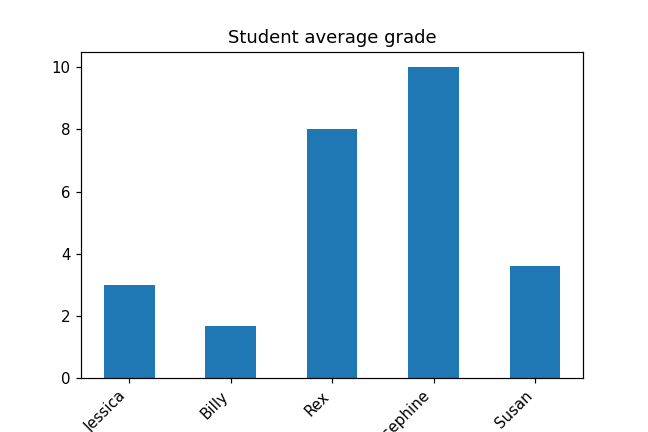

In [67]:
# 8.C
import matplotlib.pyplot as plt

def show_avg_grade_bar_chart(students):
    student_names = []
    avg_grades = []
    for student in students:
        student_names.append(student.name)
        avg_grades.append(student.get_avg_grade())
    plt.bar(student_names, avg_grades, width=0.5, align='center')
    plt.xticks(rotation=45, horizontalalignment='right',fontweight='light')
    plt.title('Student average grade')

show_avg_grade_bar_chart(students) 

In [68]:
# 9
for student in students:
    print(student.name + ' has completed ' + str(student.get_study_progression()) + ' %')

Jessica has completed 86.66666666666667 %
Billy has completed 73.33333333333333 %
Rex has completed 60.0 %
Josephine has completed 26.666666666666668 %
Susan has completed 93.33333333333333 %


<IPython.core.display.Javascript object>


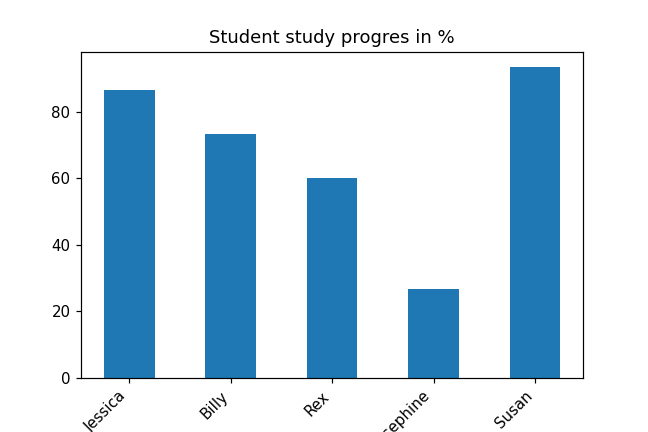

In [69]:
# 10
import matplotlib.pyplot as plt

def show_study_progression_bar_chart(students):
    student_names = []
    study_prg = []
    for student in students:
        student_names.append(student.name)
        study_prg.append(student.get_study_progression())
    plt.bar(student_names, study_prg, width=0.5, align='center')
    plt.xticks(rotation=45, horizontalalignment='right',fontweight='light')
    plt.title('Student study progres in %')

show_study_progression_bar_chart(students)

#### Exercise 2